# Домашнее задание №2: Advanced ML: ДЗ 2 - байесовский коронавирус

## 1. 
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [288]:
import pandas as pd
import datetime
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [212]:
data = pd.read_csv('owid-covid-data.csv')
data['date'] = pd.to_datetime(data['date'])
data_russia = data[ data['location'] == "Russia"][data['date'] > datetime.date(2020, 3, 3) ]
train = data_russia.head(50)
test = data_russia.tail(data_russia.shape[0]-50)

/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## 2.
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.


<Figure size 432x288 with 0 Axes>

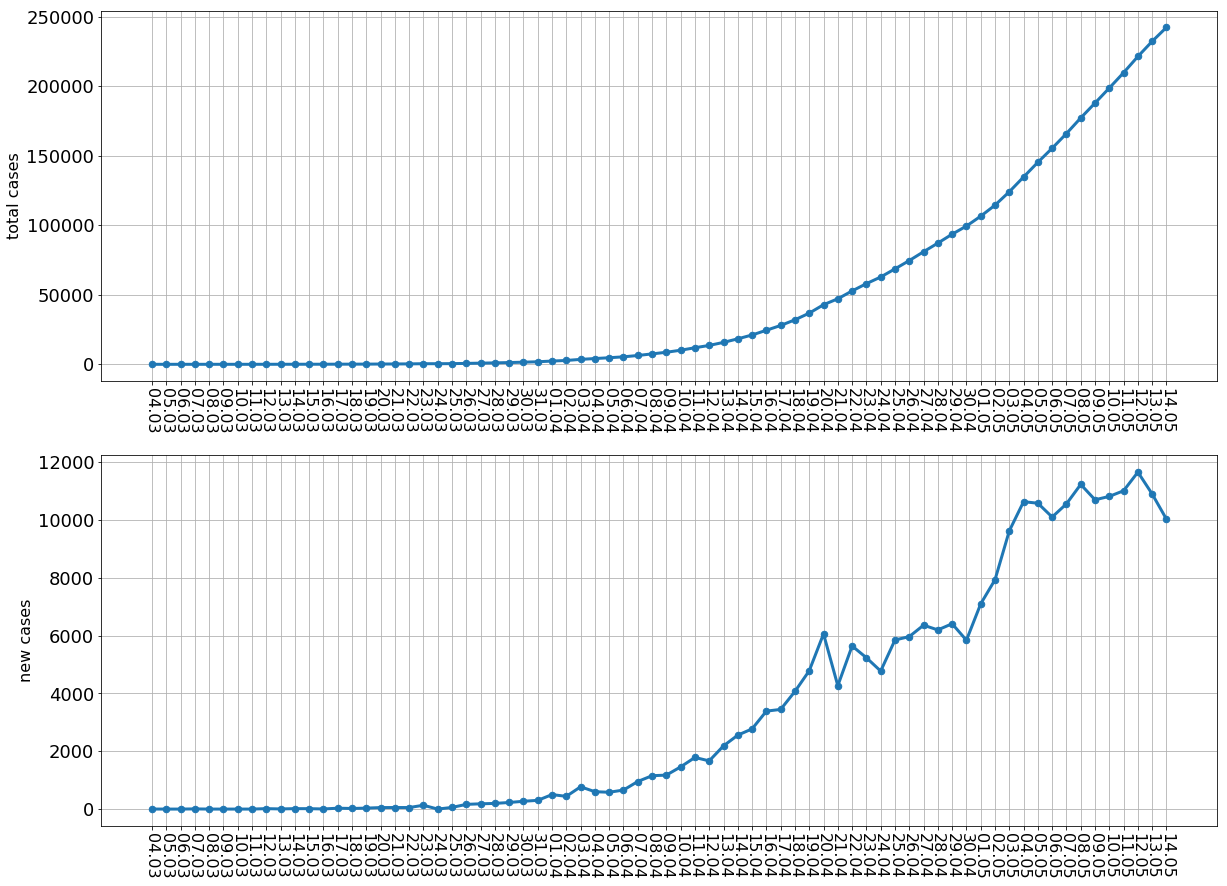

In [214]:
def plot_df(df):
    plt.figure()
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(20,15))


    plt.subplot(211)
    plt.plot(df['date'].dt.strftime('%d.%m'), df.total_cases, '.-', linewidth=3, markersize=13 )
    plt.ylabel('total cases')
    plt.tick_params(axis="x", labelrotation=-90)
    plt.tick_params(axis="y", labelsize=18)
    plt.grid(True)


    plt.subplot(212)
    plt.plot(df['date'].dt.strftime('%d.%m'), df.new_cases, '.-', linewidth=3, markersize=13)
    plt.ylabel('new cases')
    plt.grid(True)
    plt.tick_params(axis="x", labelrotation=-90)
    plt.tick_params(axis="y", labelsize=18)
    plt.grid(True)

    plt.show()
    
def plot(x,y):
    plt.figure()
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(10,10))

    plt.plot(x, y, '.-', linewidth=3, markersize=13 )
    plt.ylabel('total cases')
    plt.tick_params(axis="x", labelrotation=-90)
    plt.tick_params(axis="y", labelsize=18)
    plt.grid(True)
plot_df(data_russia)

<Figure size 432x288 with 0 Axes>

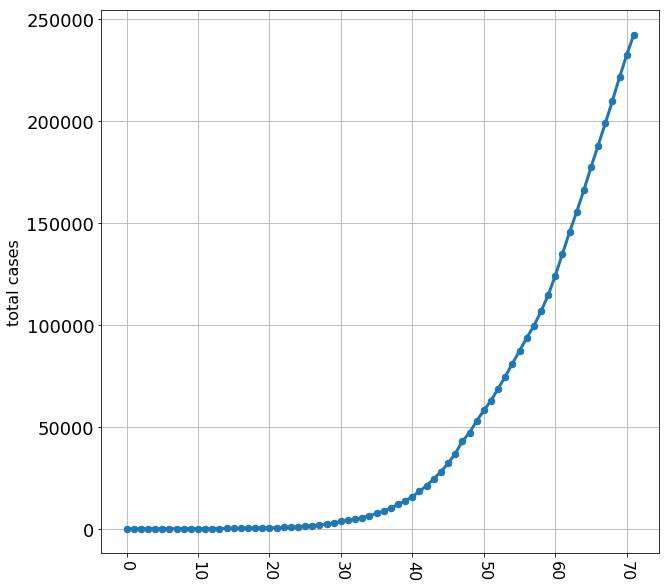

In [229]:
plt.figure()
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,10))

plt.plot(np.arange(data_russia.shape[0]), data_russia.total_cases, '.-', linewidth=3, markersize=13 )
plt.ylabel('total cases')
plt.tick_params(axis="x", labelrotation=-90)
plt.tick_params(axis="y", labelsize=18)
#plt.yscale('log')
plt.grid(True)

Text(0.5, 1.0, 'log(y) ~ линейная функция от x, где x — номер текущего дня.')

<Figure size 432x288 with 0 Axes>

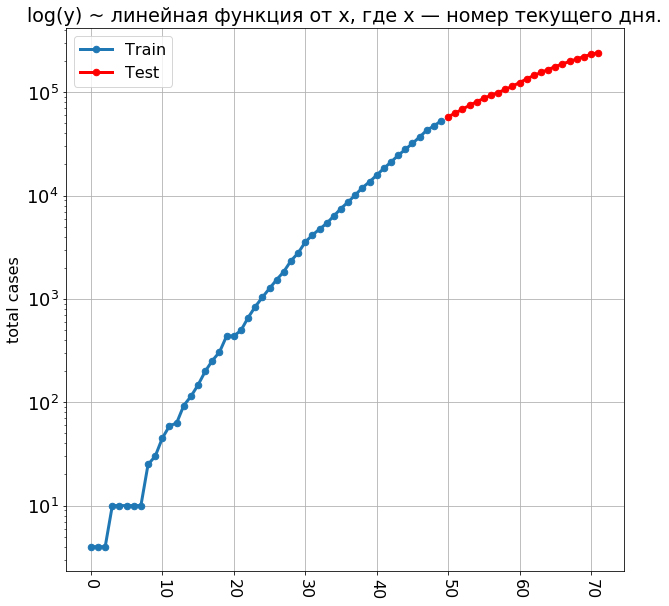

In [246]:
train = data_russia.head(50)
test = data_russia.tail(data_russia.shape[0]-50)

train_day_numbers =  np.arange(train.shape[0]) 
test_day_numbers =  np.arange(test.shape[0]) + train.shape[0]

plt.figure()
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,10))

plt.plot(train_day_numbers, train.total_cases, '.-', linewidth=3, markersize=13 )
plt.plot(test_day_numbers, test.total_cases, '.-', linewidth=3, markersize=13, color='red' )
plt.ylabel('total cases')
plt.tick_params(axis="x", labelrotation=-90)
plt.tick_params(axis="y", labelsize=18)
plt.yscale('log')
plt.grid(True)
plt.legend(["Train", "Test"])
plt.title('log(y) ~ линейная функция от x, где x — номер текущего дня.')

Text(0.5, 1.0, 'y ~ exp(линейная функция от x), где x — номер текущего дня.')

<Figure size 432x288 with 0 Axes>

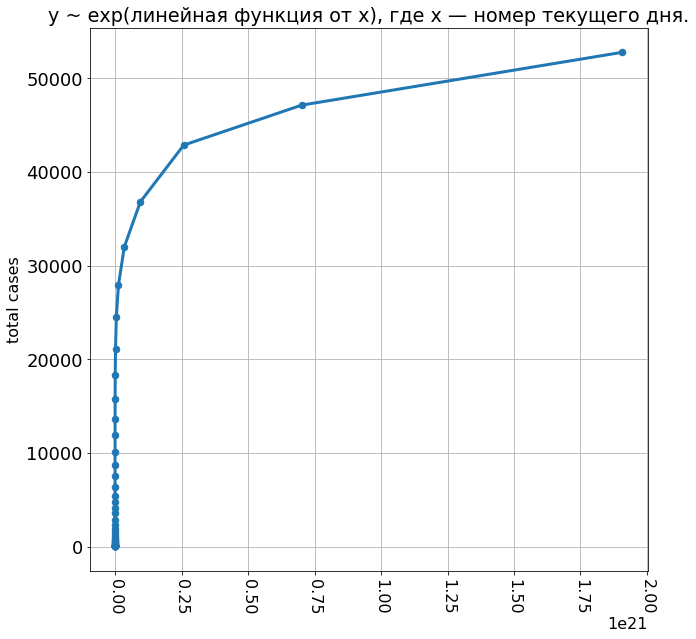

In [189]:
plot(np.exp(train_day_numbers), np.asarray(train.total_cases))
plt.title('y ~ exp(линейная функция от x), где x — номер текущего дня.')

### 2.a
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

Text(0.5, 1.0, 'y ~ exp(линейная функция от x), где x — номер текущего дня.')

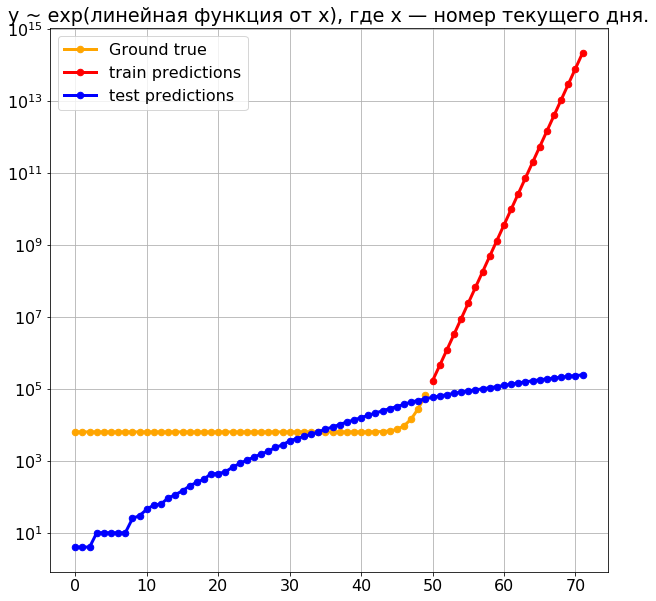

In [350]:
lin_reg_model = linear_model.LinearRegression().fit(np.exp(train_day_numbers).reshape(-1, 1), np.asarray(train.total_cases))
predictions_train = lin_reg_model.predict(np.exp(train_day_numbers.reshape(-1, 1)))
predictions_test = lin_reg_model.predict(np.exp(test_day_numbers.reshape(-1, 1)))

plt.figure(figsize=(10,10))
plt.plot(train_day_numbers, predictions_train ,  '.-', linewidth=3, markersize=13, color='orange')
plt.plot(test_day_numbers, predictions_test ,  '.-', linewidth=3, markersize=13, color='red')
plt.plot(np.arange(data_russia.shape[0]), data_russia.total_cases,  '.-', linewidth=3, markersize=13, color='blue')
plt.grid(True)
plt.yscale('log')
plt.legend(["Ground true", "train predictions", "test predictions"])
plt.title('y ~ exp(линейная функция от x), где x — номер текущего дня.')

Text(0.5, 1.0, 'log(y) ~ линейная функция от x, где x — номер текущего дня.')

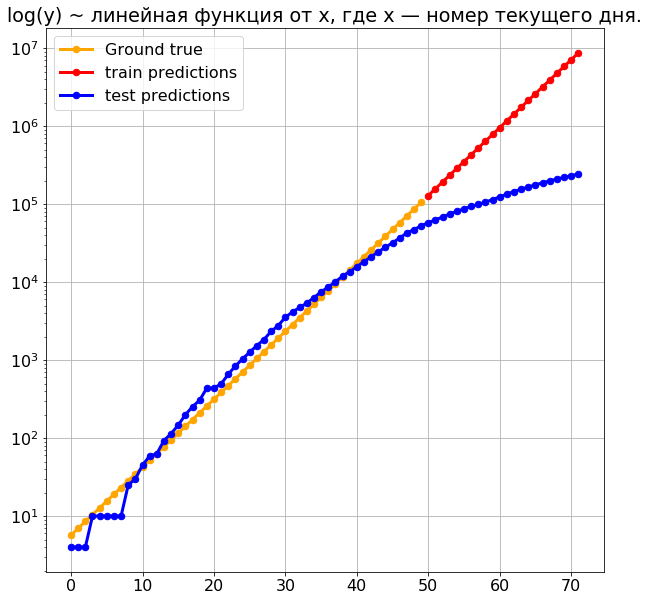

In [351]:
lin_reg_model = linear_model.LinearRegression().fit(train_day_numbers.reshape(-1, 1), np.log(np.asarray(train.total_cases)))
predictions_train = np.exp(lin_reg_model.predict(train_day_numbers.reshape(-1, 1)))
predictions_test = np.exp(lin_reg_model.predict(test_day_numbers.reshape(-1, 1)))

plt.figure(figsize=(10,10))
plt.plot(train_day_numbers, predictions_train ,  '.-', linewidth=3, markersize=13, color='orange')
plt.plot(test_day_numbers, predictions_test ,  '.-', linewidth=3, markersize=13, color='red')
plt.plot(np.arange(data_russia.shape[0]), data_russia.total_cases,  '.-', linewidth=3, markersize=13, color='blue')
plt.grid(True)
plt.yscale('log')
plt.legend(["Ground true", "train predictions", "test predictions"])
plt.title('log(y) ~ линейная функция от x, где x — номер текущего дня.')

## 2.b
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).


$\Sigma_0$ - матрица априоного распределения = $\sigma_0^2 I$, для достаточно широкого априорного распределения положим $\sigma_0^2$ = 10

$\sigma^2$ - дисперсия шума модели, mse ошибка нашей модели - первый шаг эмпирического Байеса

$\mu_0$ - матожидание априоного распределения весов, полагаем = 0

$p(w) = \mathcal{N}(w|0, \sigma_0^2 I)$ - априорное распределение 

$p(w|D) = \mathcal{N}(w| \mu_N , \Sigma_N)$  - апостериорное распределение 

$\Sigma_N = \left(\frac{1}{\sigma_0^2}I + \frac{1}{\sigma^2}X^T X\right)^{-1}$
$\mu_N = \Sigma_N\left(\frac{1}{\sigma^2}X^T \ln{y}\right);$

In [352]:
dispersion = lin_reg_model.score(train_day_numbers.reshape(-1, 1), np.log(np.asarray(train.total_cases)))
dispersion_0 = 10
X = np.ones((len(train_day_numbers), 2))
X[:, 1] = train_day_numbers
sigma_N = np.linalg.inv(np.eye(2)*(1/dispersion_0) + (X.T @ X) / dispersion)
mu_N = sigma_N @ (X.T @ np.log(np.asarray(train.total_cases))) / dispersion

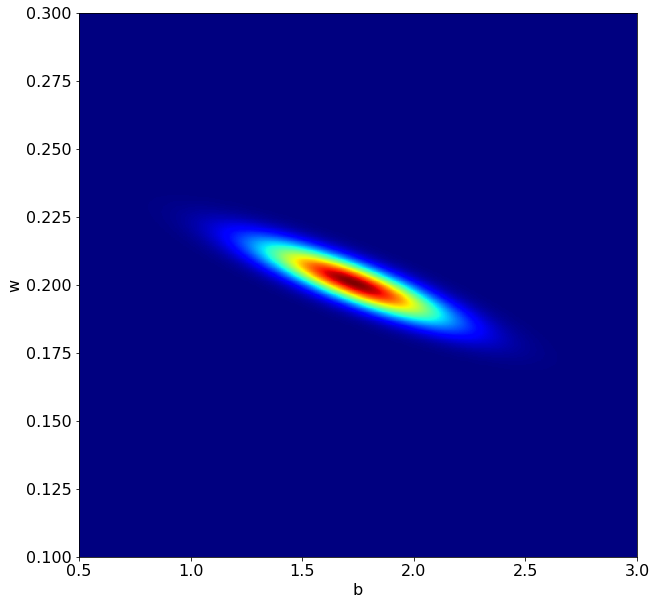

In [384]:
# plot
N = 1000
plt.figure(figsize=(10,10))
X = np.linspace(0,3,N)
Y = np.linspace(0,0.3,N)
X, Y = np.meshgrid(X,Y)
pos = np.empty(X.shape + (2,))
pos[:,:,0]=X
pos[:,:,1]=Y
Z = scipy.stats.multivariate_normal.pdf(pos, mean = mu_N, cov = sigma_N)

def heatmap(Z):

    plt.xlim((0.5,3))
    plt.ylim((0.1,0.3))
    plt.pcolormesh(X,Y,Z, cmap = plt.cm.jet)
    plt.ylabel('w')
    plt.xlabel('b')

heatmap(Z)

### 2.c
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

<Figure size 432x288 with 0 Axes>

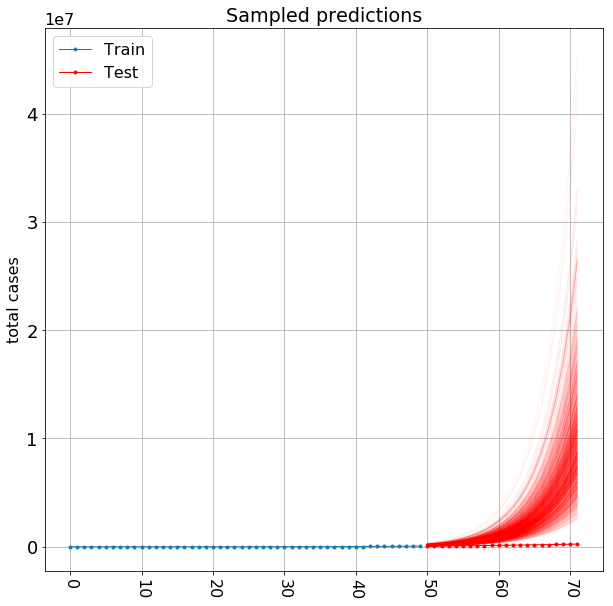

In [359]:
X = np.ones((len(train_day_numbers), 2))
X[:, 1] = train_day_numbers

sample_weights = scipy.stats.multivariate_normal(mean=mu_N, cov=sigma_N).rvs(size=1000)

plt.figure()
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,10))
plt.plot(train_day_numbers, train.total_cases, '.-', linewidth=1)
plt.plot(test_day_numbers, test.total_cases, '.-', linewidth=1, color='red' )

for wb in sample_weights:
    lin_reg_model.coef_ = np.asarray(wb[1])
    lin_reg_model.intercept_ = np.asarray(wb[0])
    predictions = np.exp(lin_reg_model.predict(test_day_numbers.reshape(-1, 1)))
    plt.plot(test_day_numbers, predictions ,  '-', linewidth=1, color='red', alpha=0.05)

plt.ylabel('total cases')
plt.tick_params(axis="x", labelrotation=-90)
plt.tick_params(axis="y", labelsize=18)
#plt.yscale('log')
plt.grid(True)
plt.legend(["Train", "Test"])
plt.title('Sampled predictions')
plt.show()


<Figure size 432x288 with 0 Axes>

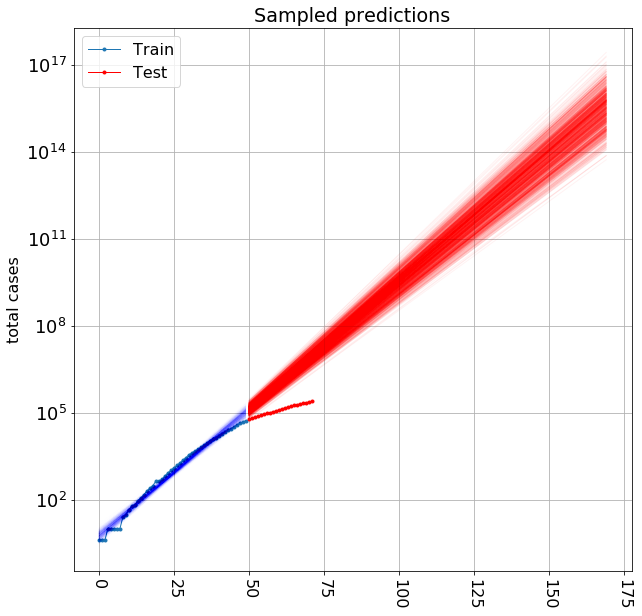

In [407]:
X = np.ones((len(train_day_numbers), 2))
X[:, 1] = train_day_numbers

predict_day_numbers = np.arange(120) + train.shape[0]
sample_weights = scipy.stats.multivariate_normal(mean=mu_N, cov=sigma_N).rvs(size=1000)


first_may = []
first_june = []
first_september = []

plt.figure()
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,10))
plt.plot(train_day_numbers, train.total_cases, '.-', linewidth=1)
plt.plot(test_day_numbers, test.total_cases, '.-', linewidth=1, color='red' )

for wb in sample_weights:
    lin_reg_model.coef_ = np.asarray(wb[1])
    lin_reg_model.intercept_ = np.asarray(wb[0])
    predictions_train = np.exp(lin_reg_model.predict(train_day_numbers.reshape(-1, 1)))
    predictions_test = np.exp(lin_reg_model.predict(predict_day_numbers.reshape(-1, 1)))
    plt.plot(predict_day_numbers, predictions_test ,  '-', linewidth=1, color='red', alpha=0.05)
    plt.plot(train_day_numbers, predictions_train ,  '-', linewidth=1, color='blue', alpha=0.005)
    
    
    # первое мая - 58 день
    # первое июня - 69 день
    # первое сентября - 160 день
    first_may.append(predictions_test[8][0])
    first_june.append(predictions_test[19][0])
    first_september.append(predictions_test[110][0])


plt.ylabel('total cases')
plt.tick_params(axis="x", labelrotation=-90)
plt.tick_params(axis="y", labelsize=18)
plt.yscale('log')
plt.grid(True)
plt.legend(["Train", "Test"])
plt.title('Sampled predictions')
plt.show()

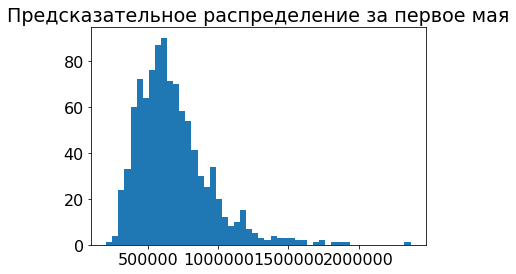

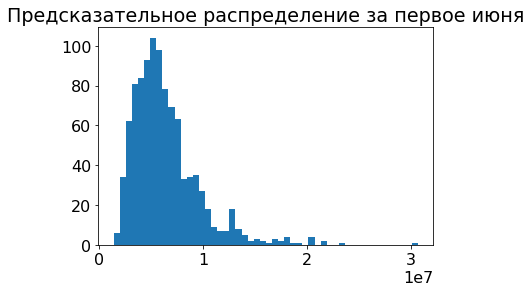

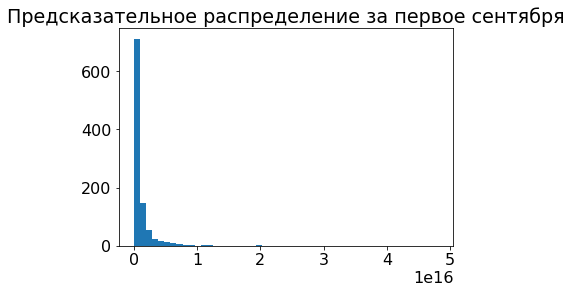

In [405]:
plt.hist(first_may, bins=50)
plt.title('Предсказательное распределение за первое мая')
plt.show()

plt.hist(first_june, bins=50)
plt.title('Предсказательное распределение за первое июня')
plt.show()

plt.hist(first_september, bins=50)
plt.title('Предсказательное распределение за первое сентября')
plt.show()

In [386]:
print(f'Среднее за первое мая: {np.mean(first_may)}')
print(f'Среднее за первое июня: {np.mean(first_june)}')
print(f'Среднее за первое сентября: {np.mean(first_september)}')

Среднее за первое мая: 677081.7872626941
Среднее за первое июня: 6409263.776460928
Среднее за первое сентября: 1248896383203080.8


## 3.
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана.

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.


### 3.a
Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

В экспоненте под интегралом может быть произвольная квадратичная функция от t - $ at^2 + bt +c $

Если будем использовать в качестве целевой переменной $y'$ прирост (new_cases), то можем учить $y'(x) = e^{ax^2 + bx +c}$,  $ln(y'(x)) = ax^2 + bx +c$. 

### 3.b

Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.


Text(0.5, 1.0, 'Обучаем на 50 днях')

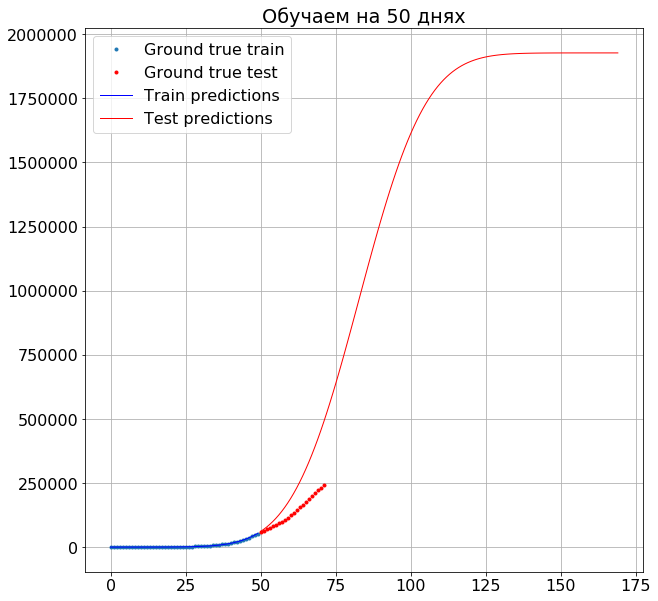

In [529]:
train = data_russia.head(50)
test = data_russia.tail(data_russia.shape[0]-50)

train_day_numbers =  np.arange(train.shape[0]) 
test_day_numbers =  np.arange(test.shape[0]) + train.shape[0]
predict_day_numbers = np.arange(120) + train.shape[0]


train_y = [np.log(i) if i != 0 else 0 for i in train.new_cases.values]

def get_features(day_numbers):
    result = np.zeros((day_numbers.size, 3))
    for i in range(day_numbers.size):
        result[i][0] = 1
        result[i][1] = day_numbers[i]
        result[i][2] = day_numbers[i]*day_numbers[i]
    return result

lin_reg_model = linear_model.LinearRegression(fit_intercept=False).fit(get_features(train_day_numbers), train_y)


predictions_train = np.exp(lin_reg_model.predict(get_features(train_day_numbers)))
predictions_test = np.exp(lin_reg_model.predict(get_features(predict_day_numbers)))

def calulate_total(prediction):
    for i in range(1,len(prediction)):
        prediction[i] = prediction[i] + prediction[i - 1]
    return prediction

total_predictions_train =  calulate_total(predictions_train)
total_predictions_test =  calulate_total(predictions_test) +  total_predictions_train[-1]


plt.figure(figsize=(10,10))

plt.plot(train_day_numbers, train.total_cases, '.')
plt.plot(test_day_numbers, test.total_cases, '.', color='red' )

plt.plot(train_day_numbers, total_predictions_train  ,  '-', linewidth=1, color='blue')
plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=1, color='red')

    
plt.grid(True)
#plt.yscale('log')
plt.legend(["Ground true train", "Ground true test", "Train predictions", "Test predictions"])
plt.title('Обучаем на 50 днях')

Text(0.5, 1.0, 'Обучаем на 60 днях')

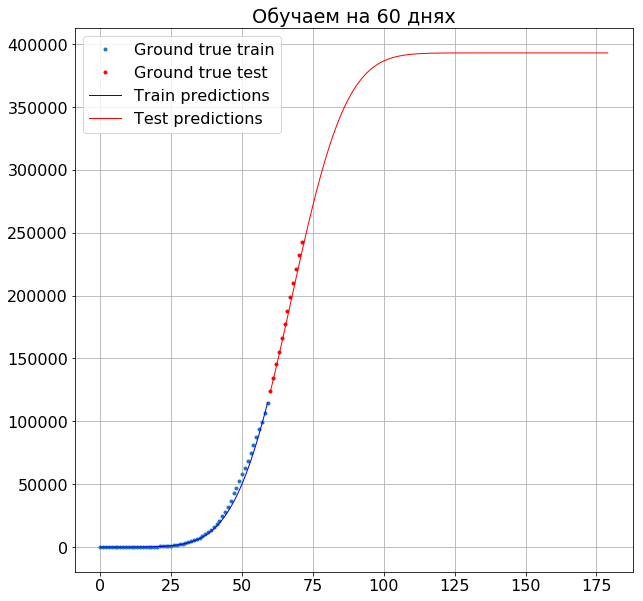

In [530]:
train = data_russia.head(60)
test = data_russia.tail(data_russia.shape[0]-60)

train_day_numbers =  np.arange(train.shape[0]) 
test_day_numbers =  np.arange(test.shape[0]) + train.shape[0]
predict_day_numbers = np.arange(120) + train.shape[0]


train_y = [np.log(i) if i != 0 else 0 for i in train.new_cases.values]

def get_features(day_numbers):
    result = np.zeros((day_numbers.size, 3))
    for i in range(day_numbers.size):
        result[i][0] = 1
        result[i][1] = day_numbers[i]
        result[i][2] = day_numbers[i]*day_numbers[i]
    return result

lin_reg_model = linear_model.LinearRegression(fit_intercept=False).fit(get_features(train_day_numbers), train_y)


predictions_train = np.exp(lin_reg_model.predict(get_features(train_day_numbers)))
predictions_test = np.exp(lin_reg_model.predict(get_features(predict_day_numbers)))

def calulate_total(prediction):
    for i in range(1,len(prediction)):
        prediction[i] = prediction[i] + prediction[i - 1]
    return prediction

total_predictions_train =  calulate_total(predictions_train)
total_predictions_test =  calulate_total(predictions_test) +  total_predictions_train[-1]


plt.figure(figsize=(10,10))

plt.plot(train_day_numbers, train.total_cases, '.')
plt.plot(test_day_numbers, test.total_cases, '.', color='red' )

plt.plot(train_day_numbers, total_predictions_train  ,  '-', linewidth=1, color='blue')
plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=1, color='red')

plt.grid(True)
#plt.yscale('log')
plt.legend(["Ground true train", "Ground true test", "Train predictions", "Test predictions"])
plt.title('Обучаем на 60 днях')

In [535]:
lin_reg_model.coef_ 

array([-0.62248633,  0.29068171, -0.00214268])

In [545]:
# дисперсия шума модели, mse ошибка нашей модели
dispersion = lin_reg_model.score(get_features(train_day_numbers), train_y)
# для достаточно широкого априорного распределения положим dispersion_0 = 100
dispersion_0 = 10

X = get_features(train_day_numbers)
sigma_N = np.linalg.inv(np.eye(3)*(1/dispersion_0) + (X.T @ X) / dispersion)
mu_N = sigma_N @ (X.T @ np.asarray(train_y)) / dispersion

print("dispersion:", dispersion, '\n')
print("dispersion_0:",dispersion_0, '\n')
print("sigma_N:", sigma_N, '\n')
print("mu_N:", mu_N, '\n')

dispersion: 0.9403642343146535 

dispersion_0: 10 

sigma_N: [[ 1.30325024e-01 -8.76012727e-03  1.22689542e-04]
 [-8.76012727e-03  8.03202815e-04 -1.27508556e-05]
 [ 1.22689542e-04 -1.27508556e-05  2.16437896e-07]] 

mu_N: [-0.61411911  0.29011306 -0.00213467] 



### 3.c

Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


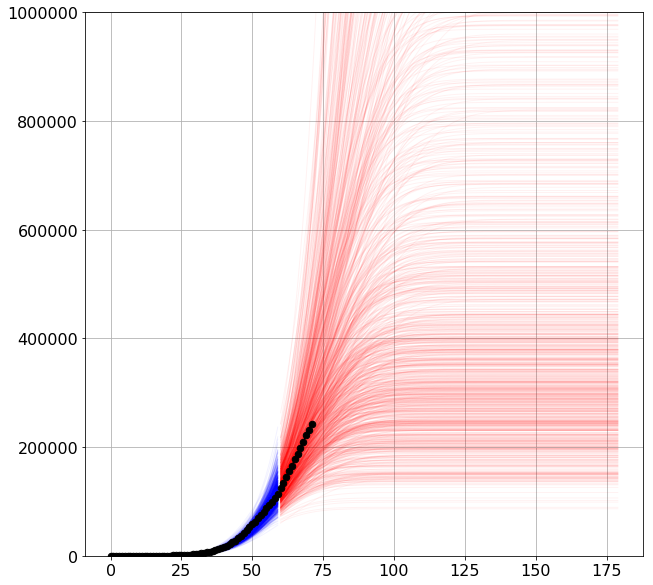

In [553]:
train = data_russia.head(60)
test = data_russia.tail(data_russia.shape[0]-60)

train_day_numbers =  np.arange(train.shape[0]) 
test_day_numbers =  np.arange(test.shape[0]) + train.shape[0]
predict_day_numbers = np.arange(120) + train.shape[0]

train_y = [np.log(i) if i != 0 else 0 for i in train.new_cases.values]

lin_reg_model = linear_model.LinearRegression(fit_intercept=False).fit(get_features(train_day_numbers), train_y)

plt.figure(figsize=(10,10))

sample_weights = scipy.stats.multivariate_normal(mean=mu_N, cov=sigma_N).rvs(size=1000)

platos = []

for w in sample_weights:
    lin_reg_model.coef_ = w

    predictions_train = np.exp(lin_reg_model.predict(get_features(train_day_numbers)))
    predictions_test = np.exp(lin_reg_model.predict(get_features(predict_day_numbers)))

    total_predictions_train =  calulate_total(predictions_train)
    total_predictions_test =  calulate_total(predictions_test) +  total_predictions_train[-1]
    
    platos.append(total_predictions_test[-1])
    
    plt.plot(train_day_numbers, total_predictions_train  ,  '-', linewidth=1, color='blue', alpha=0.05)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=1, color='red', alpha=0.05)

plt.plot(train_day_numbers, train.total_cases, '.-', color='black', markersize=13)
plt.plot(test_day_numbers, test.total_cases, '.-', color='black', markersize=13)    

plt.ylim((0,1000000))
plt.grid(True)

In [548]:
print("90-й процентиль", np.percentile(platos, 90))
print("10-й процентиль", np.percentile(platos, 10))

90-й процентиль 1357108.4127897194
10-й процентиль 188376.93626725112


## 4. 
Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?


/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to mat

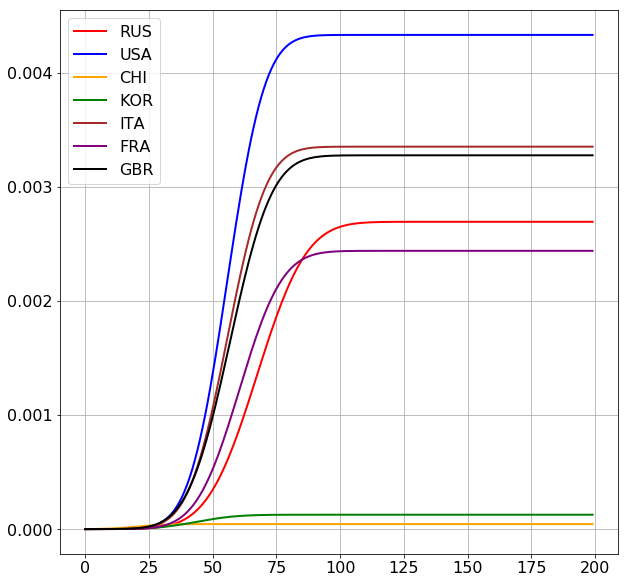

In [662]:
def plot_curves():

    plt.figure(figsize=(10,10))

    
    train_day_numbers, predict_day_numbers, total_predictions_test,  all_data_days, total_cases  = predict_for_country('RUS', datetime.date(2020, 3, 3) , 60)
    c = 'red'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases =  predict_for_country('USA', datetime.date(2020, 2, 20) , 54)
    c = 'blue'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )
    
    train_day_numbers, predict_day_numbers, total_predictions_test,  all_data_days, total_cases = predict_for_country('CHN', datetime.date(2020, 1, 20) , 50)
    c = 'orange'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )
    
    train_day_numbers, predict_day_numbers, total_predictions_test,  all_data_days, total_cases = predict_for_country('KOR', datetime.date(2020, 2, 1) , 80)
    c = 'green'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )   
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases = predict_for_country('ITA', datetime.date(2020, 2, 5) , 60)
    c = 'brown'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )   
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases = predict_for_country('FRA', datetime.date(2020, 2, 10) , 65)
    c = 'purple'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )  
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases = predict_for_country('GBR', datetime.date(2020, 2, 20) , 55)
    c = 'black'
    #plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )  
    
    plt.grid(True)

    #plt.ylim((0,1000000))
    plt.legend(["RUS", 'USA', 'CHI','KOR', 'ITA', 'FRA', 'GBR'])
    plt.show()
    
    
def predict_for_country(country_code,start_data, train_days):
    data_country = data[ data['iso_code'] == country_code][data['date'] > start_data]
    train = data_country.head(train_days)
    train_y = [np.log(i) if i != 0 else 0 for i in train.new_cases.values]
    all_data_days = np.arange(data_country.shape[0]) 
    train_day_numbers =  np.arange(train.shape[0]) 
    predict_day_numbers = np.arange(200) 
    
    
    lin_reg_model = linear_model.LinearRegression(fit_intercept=False).fit(get_features(train_day_numbers), train_y)
    predictions_test = np.exp(lin_reg_model.predict(get_features(predict_day_numbers)))
    total_predictions_test =  calulate_total(predictions_test)
    return train_day_numbers, predict_day_numbers, total_predictions_test/data_country['population'].unique()[0], all_data_days,  data_country.total_cases/data_country['population'].unique()[0]

plot_curves()

Если рассчитать предсказания по заражению процента населения, то (грубо) выделяются следующие кластеры: 
1. CHN, KOR
2. GBT, ITA
3. Возможно FRA, RUS

/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
/home/w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to mat

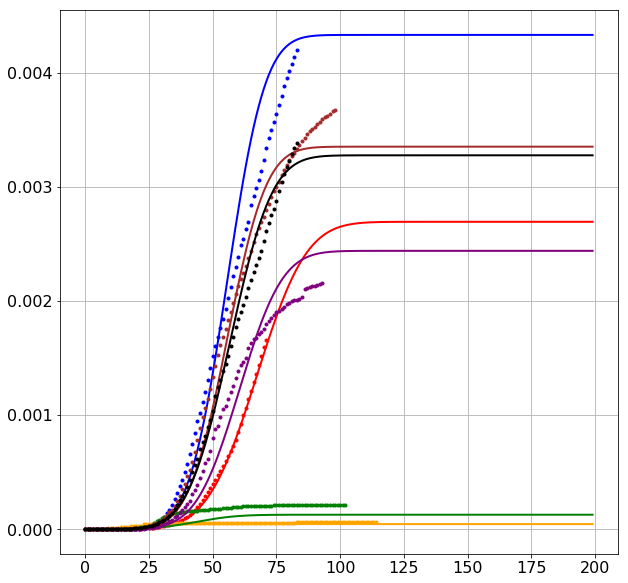

In [663]:
def plot_curves():

    plt.figure(figsize=(10,10))

    
    train_day_numbers, predict_day_numbers, total_predictions_test,  all_data_days, total_cases  = predict_for_country('RUS', datetime.date(2020, 3, 3) , 60)
    c = 'red'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases =  predict_for_country('USA', datetime.date(2020, 2, 20) , 54)
    c = 'blue'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )
    
    train_day_numbers, predict_day_numbers, total_predictions_test,  all_data_days, total_cases = predict_for_country('CHN', datetime.date(2020, 1, 20) , 50)
    c = 'orange'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )
    
    train_day_numbers, predict_day_numbers, total_predictions_test,  all_data_days, total_cases = predict_for_country('KOR', datetime.date(2020, 2, 1) , 80)
    c = 'green'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )   
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases = predict_for_country('ITA', datetime.date(2020, 2, 5) , 60)
    c = 'brown'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )   
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases = predict_for_country('FRA', datetime.date(2020, 2, 10) , 65)
    c = 'purple'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )  
    
    train_day_numbers, predict_day_numbers, total_predictions_test, all_data_days, total_cases = predict_for_country('GBR', datetime.date(2020, 2, 20) , 55)
    c = 'black'
    plt.plot(all_data_days, total_cases, '.', color=c)
    plt.plot(predict_day_numbers, total_predictions_test,  '-', linewidth=2, color=c )  
    
    plt.grid(True)

    plt.show()
    
    
def predict_for_country(country_code,start_data, train_days):
    data_country = data[ data['iso_code'] == country_code][data['date'] > start_data]
    train = data_country.head(train_days)
    train_y = [np.log(i) if i != 0 else 0 for i in train.new_cases.values]
    all_data_days = np.arange(data_country.shape[0]) 
    train_day_numbers =  np.arange(train.shape[0]) 
    predict_day_numbers = np.arange(200) 
    
    
    lin_reg_model = linear_model.LinearRegression(fit_intercept=False).fit(get_features(train_day_numbers), train_y)
    predictions_test = np.exp(lin_reg_model.predict(get_features(predict_day_numbers)))
    total_predictions_test =  calulate_total(predictions_test)
    return train_day_numbers, predict_day_numbers, total_predictions_test/data_country['population'].unique()[0], all_data_days,  data_country.total_cases/data_country['population'].unique()[0]

plot_curves()

## 5.
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

Вероятно, причина плохой предсказательной силы модели, обученной на 50 днях во введённых мерах, которые не попали в обучающую выборку, но изменили характер зависимости. 
Модель, обученная на 60 днях показывает результат введения мер, а обученная на 50 днях - характер развития ситуации в случае, если бы меры не были введены.